In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pydotplus
from IPython.display import Image 

Załadowanie danych

In [2]:
data=pd.read_csv('tennis.csv')
data.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


Dane z tabeli (bez atrybutu **PlayTennis**) zapisujemy w kodowaniu **one-hot**

In [3]:
one_hot_data = pd.get_dummies(data[ ['Outlook','Temperature'] ])
one_hot_data

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild
0,0,0,1,0,1,0
1,0,0,1,0,1,0
2,1,0,0,0,1,0
3,0,1,0,0,0,1
4,0,1,0,1,0,0
5,0,1,0,1,0,0
6,1,0,0,1,0,0
7,0,0,1,0,0,1
8,0,0,1,1,0,0
9,0,1,0,0,0,1


Obiekt **DecisionTreeClassifier**

In [4]:
clf = DecisionTreeClassifier()

In [5]:
clf_train = clf.fit(one_hot_data, data['PlayTennis'])

Rysujemy drzewo decyzyjne

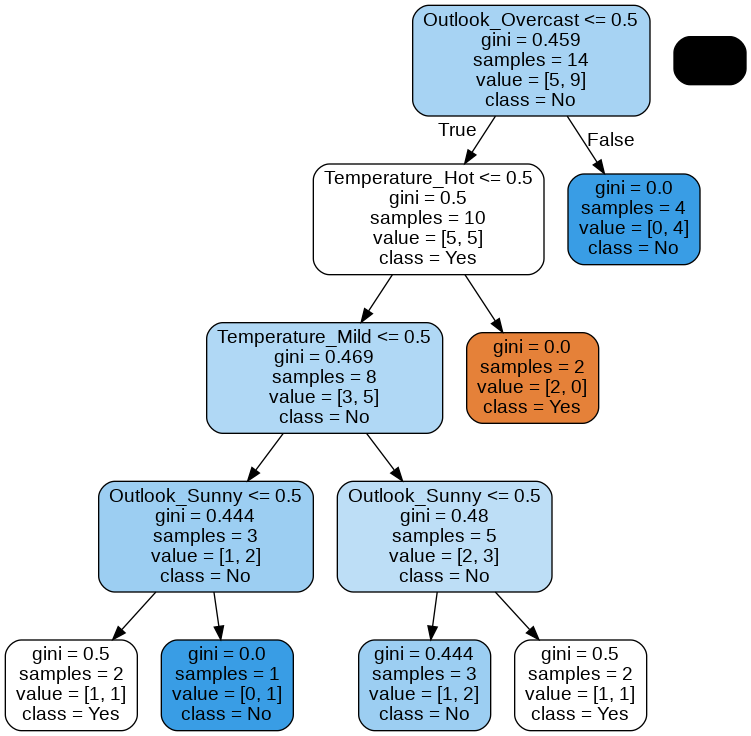

In [6]:
#print(export_graphviz(clf_train, None))

#Create Dot Data
dot_data = export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Yes', 'No'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

Testujemy model dla przypadku o parametrach: ** Rain,Hot** (zakodowany jako one-hot)

In [8]:
prediction = clf_train.predict([[0,1,0,0,1,0]])
prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)